In [60]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sns

In [121]:
groups = {"SVC": 0, "Trees": 1, "NB": 2, "Neighbors":3, "Linear":4, "DA":5, "nn":6, "Dummy":7}
labels = ["SVC", "Trees", "NB", "Neighbors", "Linear", "DA", "Network", "Dummy"]
dir = "experiment1/finalgraphs"

MAE_matrix = np.zeros((8,8))
MAE_stdev = np.zeros((8,8))
CI_matrix = np.zeros((8,8))
CI_stdev = np.zeros((8,8))
CI_sizes = np.zeros((8,8))
CI_sizes_stdev = np.zeros((8,8))

for trained_on in groups.keys():
    for eval_on in groups.keys(): 
        file_dir = f"experiment1/trained{trained_on}/eval{eval_on}/aggregate/data_summary_trained{trained_on}_eval{eval_on}.txt"
        with open(file_dir, 'r') as file:
            lines = file.readlines()
            
        print(trained_on + eval_on + lines[1])
        
        MAE_info = lines[1]
        percent_CI_info = lines[3]
        
        x = MAE_info.split(" ")[3].removeprefix("avg:").removesuffix(",")
        MAE = float(x)
        
        stdev = MAE_info.split(" ")[4].removeprefix("stdev:").removesuffix(",")
        stdev = float(stdev)
        
        MAE_matrix[groups[trained_on]][groups[eval_on]] = MAE
        MAE_stdev[groups[trained_on]][groups[eval_on]] = stdev
        
        percent_in_CI = eval(lines[2])
        percent_in_CI = [i * 100 for i in percent_in_CI]
        avg = np.average(percent_in_CI)
        stdev = np.std(percent_in_CI)
        
        CI_matrix[groups[trained_on]][groups[eval_on]] = avg
        CI_stdev[groups[trained_on]][groups[eval_on]] = stdev
        
        sizes = eval(lines[4])
        avg = np.average(sizes)
        stdev = np.std(sizes)
        
        CI_sizes[groups[trained_on]][groups[eval_on]] = avg
        CI_sizes_stdev[groups[trained_on]][groups[eval_on]] = stdev

print(MAE_matrix)

pass

SVCSVCMean absolute errors. avg:0.08935518749160422, stdev:0.08037876118275192

SVCTreesMean absolute errors. avg:0.08567063269772536, stdev:0.08348245344454909
SVCNBMean absolute errors. avg:0.09083930730363086, stdev:0.08573331478939691

SVCNeighborsMean absolute errors. avg:0.08349935462167342, stdev:0.08192945155468012
SVCLinearMean absolute errors. avg:0.09080867369850276, stdev:0.07791750012289249

SVCDAMean absolute errors. avg:0.10385967540165789, stdev:0.11308375131820211
SVCnnMean absolute errors. avg:0.0993182164308224, stdev:0.09109145479861329

SVCDummyMean absolute errors. avg:0.08222991826839396, stdev:0.0736400063214161

TreesSVCMean absolute errors. avg:0.09535320905105424, stdev:0.134592990911899
TreesTreesMean absolute errors. avg:0.06195288209803433, stdev:0.08440481568037689

TreesNBMean absolute errors. avg:0.09187505201436241, stdev:0.11720138269723689
TreesNeighborsMean absolute errors. avg:0.08393218888635712, stdev:0.11762495847573283

TreesLinearMean absolute

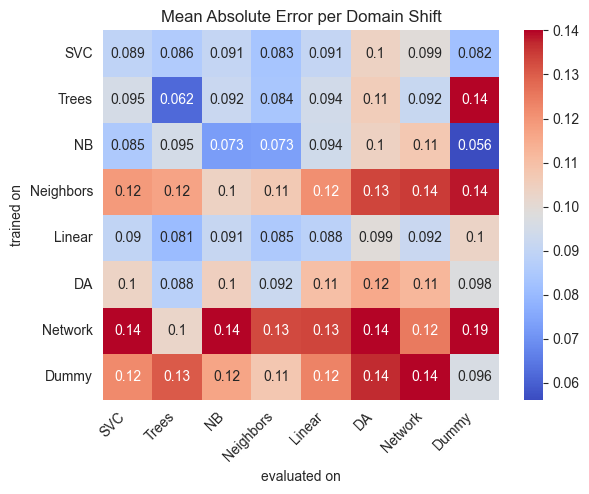

In [51]:
plot = sns.heatmap(MAE_matrix, 
            cmap="coolwarm",
            annot=True,
            vmax=0.14,
            xticklabels=labels,
            yticklabels=labels)
plot.set(ylabel="trained on", xlabel="evaluated on")
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Mean Absolute Error per Domain Shift"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

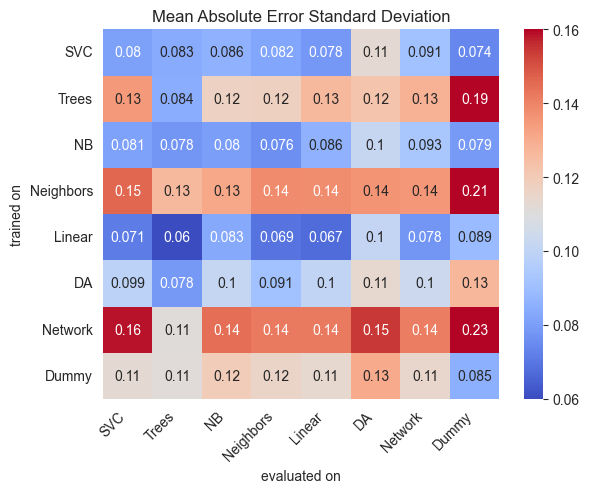

In [52]:
plot = sns.heatmap(MAE_stdev, 
            cmap="coolwarm",
            annot=True,
            vmax= 0.16,
            xticklabels=labels,
            yticklabels=labels)
plot.set(ylabel="trained on", xlabel="evaluated on")
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Mean Absolute Error Standard Deviation"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

C:\Users\maxso\AppData\Local\Temp\ipykernel_26080\1807750150.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(labels= labels, rotation=45, ha="right")


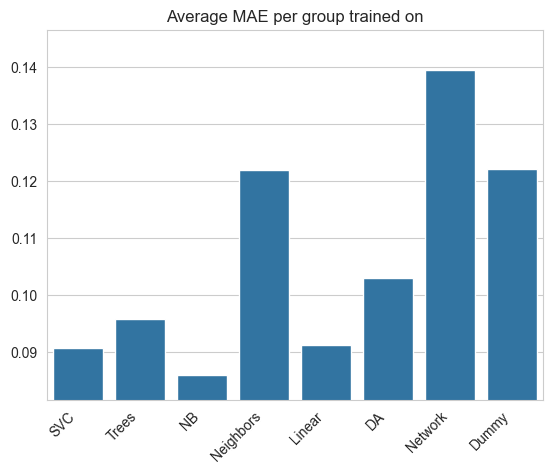

In [53]:
error_per_trained = np.average(MAE_matrix, axis=1)
high = max(error_per_trained) * 1.05
low = min(error_per_trained) * 0.95
plot = sns.barplot(x=labels, y=error_per_trained)
plt.ylim([low, high])
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Average MAE per group trained on"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

C:\Users\maxso\AppData\Local\Temp\ipykernel_26080\2552758926.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(labels= labels, rotation=45, ha="right")


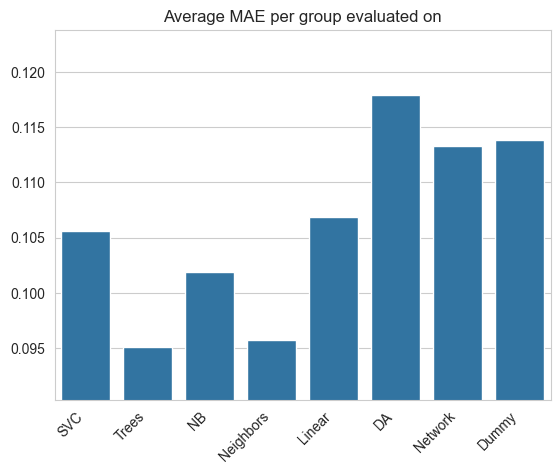

In [54]:
error_per_evaluated = np.average(MAE_matrix, axis=0)
high = max(error_per_evaluated) * 1.05
low = min(error_per_evaluated) * 0.95
plot = sns.barplot(x=labels, y=error_per_evaluated)
plt.ylim([low, high])
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Average MAE per group evaluated on"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

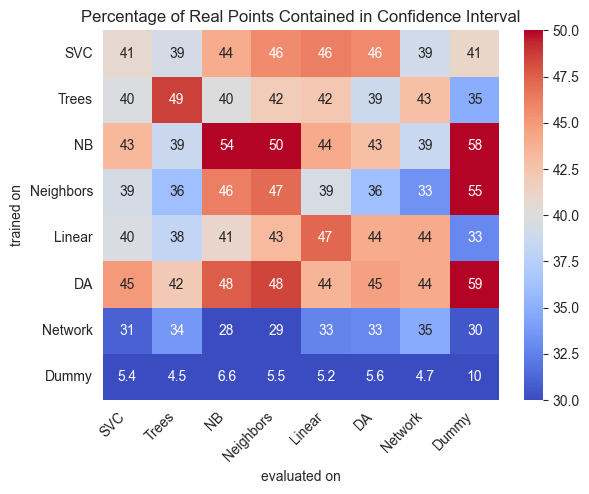

In [55]:
plot = sns.heatmap(CI_matrix, 
            cmap="coolwarm",
            annot=True,
            vmax=50,
            vmin=30,
            xticklabels=labels,
            yticklabels=labels)
plot.set(ylabel="trained on", xlabel="evaluated on")
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Percentage of Real Points Contained in Confidence Interval"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

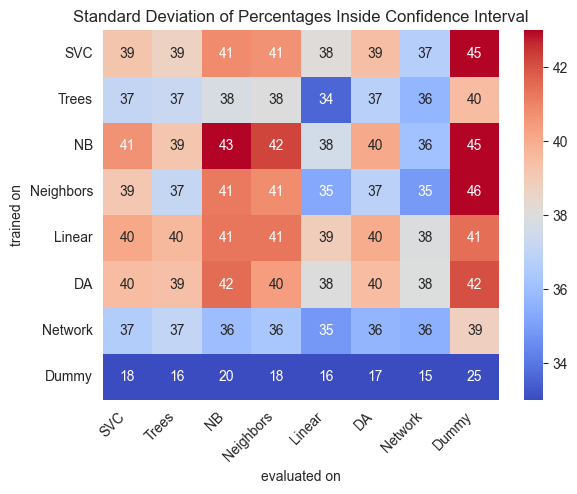

In [56]:
plot = sns.heatmap(CI_stdev, 
            cmap="coolwarm",
            annot=True,
            vmax=43,
            vmin=33,
            xticklabels=labels,
            yticklabels=labels)
plot.set(ylabel="trained on", xlabel="evaluated on")
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Standard Deviation of Percentages Inside Confidence Interval"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

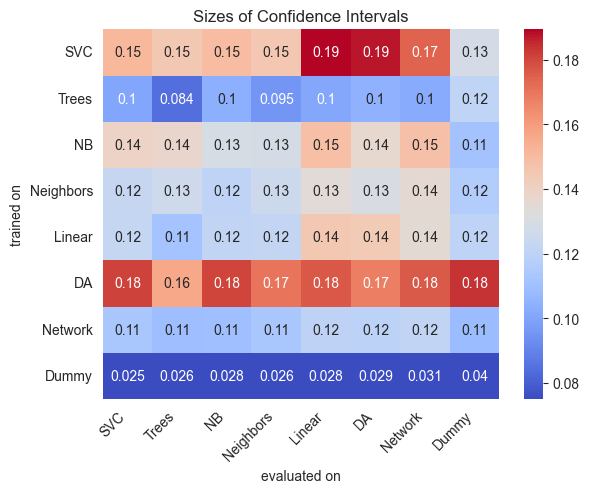

In [57]:
plot = sns.heatmap(CI_sizes, 
            cmap="coolwarm",
            annot=True,
            vmin=0.075,
            xticklabels=labels,
            yticklabels=labels)
plot.set(ylabel="trained on", xlabel="evaluated on")
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Sizes of Confidence Intervals"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

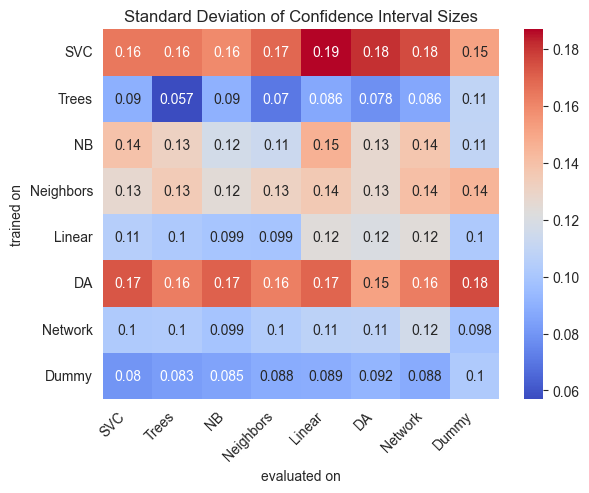

In [58]:
plot = sns.heatmap(CI_sizes_stdev, 
            cmap="coolwarm",
            annot=True,
            xticklabels=labels,
            yticklabels=labels)
plot.set(ylabel="trained on", xlabel="evaluated on")
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Standard Deviation of Confidence Interval Sizes"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

C:\Users\maxso\AppData\Local\Temp\ipykernel_26080\540695433.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(labels= labels, rotation=45, ha="right")


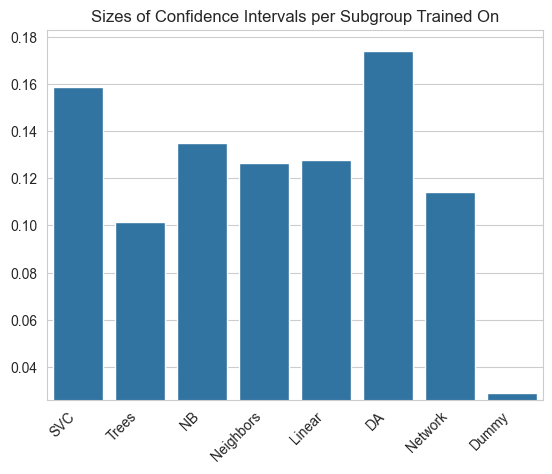

In [59]:
size_per_trained = np.average(CI_sizes, axis=1)
high = max(size_per_trained) * 1.05
low = min(size_per_trained) * 0.9
plot = sns.barplot(x=labels, y=size_per_trained)
plt.ylim([low, high])
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Sizes of Confidence Intervals per Subgroup Trained On"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

[[ 0.         -0.00368455  0.00148412 -0.00585583  0.00145349  0.01450449
   0.00996303 -0.00712527]
 [ 0.03340033  0.          0.02992217  0.02197931  0.03225011  0.0437467
   0.02986266  0.07961938]
 [ 0.01258041  0.02234551  0.          0.00074213  0.02146022  0.03147818
   0.03495643 -0.01642858]
 [ 0.01201327  0.0101055  -0.00296904  0.          0.01413691  0.02664249
   0.02813813  0.03170875]
 [ 0.00191741 -0.00760072  0.0031733  -0.00303077  0.          0.01084874
   0.00363198  0.01497724]
 [-0.01215127 -0.02780235 -0.01096786 -0.02335566 -0.00572869  0.
  -0.00346506 -0.01803509]
 [ 0.01489461 -0.02259588  0.01801006  0.00800884  0.00864486  0.01930501
   0.          0.06992601]
 [ 0.02596763  0.03402915  0.020415    0.01148821  0.02700999  0.04054687
   0.04746161  0.        ]]


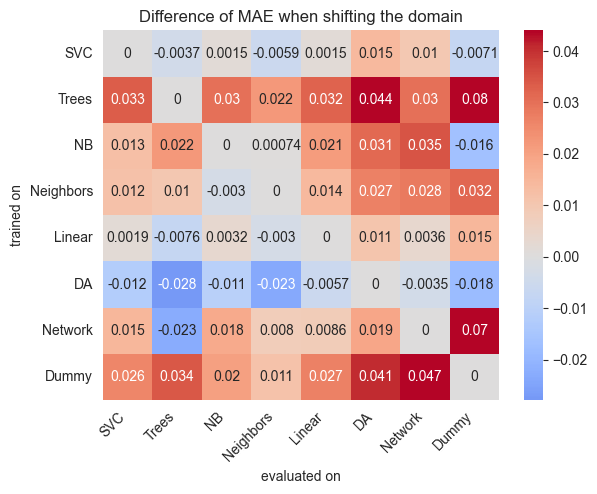

In [122]:
diff_matrix = np.zeros((8,8))
for i in range(8):
    for j in range(8):
        diff_matrix[i][j] = MAE_matrix[i][j] - MAE_matrix[i][i]
print(diff_matrix)
# labels = labels[0:7]
plot = sns.heatmap(diff_matrix, 
            cmap="coolwarm",
            annot=True,
            vmax= 0.044,
            center=0.0,
            xticklabels=labels,
            yticklabels=labels)
plot.set(ylabel="trained on", xlabel="evaluated on")
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Difference of MAE when shifting the domain"
plot.set_title(name)
# plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

['SVC', 'Trees', 'NB', 'Neighbors', 'Linear', 'DA', 'Network', 'Dummy']


C:\Users\maxso\AppData\Local\Temp\ipykernel_26080\3739192600.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(labels= labels, rotation=45, ha="right")


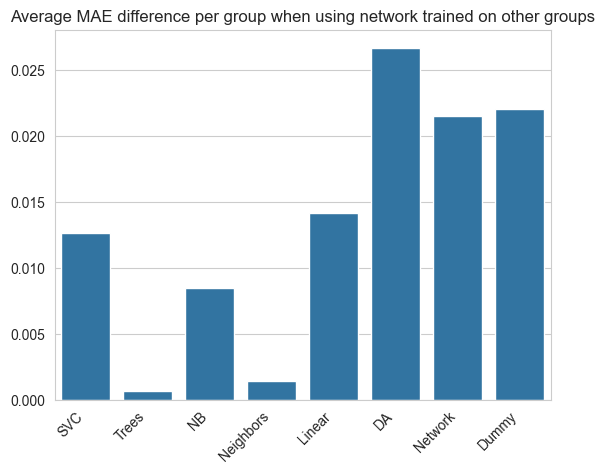

In [123]:
error_per_evaluated = np.sum(diff_matrix, axis=0)/7
# high = max(error_per_evaluated) * 1.05
# low = min(error_per_evaluated) * 0.95
plot = sns.barplot(x=labels, y=error_per_evaluated)
print(labels)
# plt.ylim([low, high])
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Average MAE difference per group when using network trained on other groups"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

C:\Users\maxso\AppData\Local\Temp\ipykernel_26080\341652508.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(labels= labels, rotation=45, ha="right")


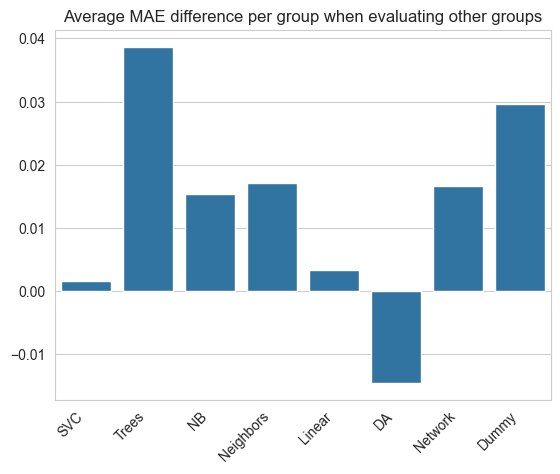

In [124]:
error_per_trained = np.sum(diff_matrix, axis=1)/7
plot = sns.barplot(x=labels, y=error_per_trained)
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Average MAE difference per group when evaluating other groups"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()